In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import plotly.express as px

In [66]:
df = pd.read_excel('C:/Users/sudet/Downloads/210/final_dataset.xlsx')

In [67]:
# Convert the Date and Time columns to datetime format if not already done
df['DateTime'] = pd.to_datetime(df['Date'].astype(str) + ' ' + df['Time'])

# Group by Date and aggregate the Amount and Balance
daily_spending = df.sort_values(by='DateTime').groupby('Date').agg({
    'Amount': 'sum',
    'Balance': 'last'
}).reset_index()

# Convert the Date column to datetime format for sorting
daily_spending['Date'] = pd.to_datetime(daily_spending['Date'], format='%d.%m.%Y')

# Sort by Date starting from the earliest
daily_spending = daily_spending.sort_values(by='Date')

# Display the daily spending
print(daily_spending)

          Date   Amount   Balance
59  2022-10-04  -229.00   4146.00
72  2022-10-05  -450.99   3695.01
98  2022-10-07   -28.70   6166.31
110 2022-10-08   -50.95   6115.36
125 2022-10-09   -15.60   6099.76
..         ...      ...       ...
279 2024-10-21   -70.00  22238.54
289 2024-10-22  -435.00  21803.54
300 2024-10-23  -295.20  21508.34
317 2024-10-24 -1964.13  19544.21
326 2024-10-25 -2319.94  17224.27

[390 rows x 3 columns]


C:\Users\sudet\AppData\Local\Temp\ipykernel_21568\1556106525.py:2: UserWarning:

Parsing dates in %d.%m.%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.



In [68]:
daily_spending['Amount'] = daily_spending['Amount'].abs()
print(daily_spending)

          Date   Amount   Balance
59  2022-10-04   229.00   4146.00
72  2022-10-05   450.99   3695.01
98  2022-10-07    28.70   6166.31
110 2022-10-08    50.95   6115.36
125 2022-10-09    15.60   6099.76
..         ...      ...       ...
279 2024-10-21    70.00  22238.54
289 2024-10-22   435.00  21803.54
300 2024-10-23   295.20  21508.34
317 2024-10-24  1964.13  19544.21
326 2024-10-25  2319.94  17224.27

[390 rows x 3 columns]


In [6]:
daily_spending.head()

,Date,Amount,Balance
59,2022-10-04,229.00,4146.00
72,2022-10-05,450.99,3695.01
98,2022-10-07,28.70,6166.31
110,2022-10-08,50.95,6115.36
125,2022-10-09,15.60,6099.76


In [74]:
fig = px.scatter(daily_spending, x='Date', y='Amount', title='Daily Spending Over Time')
fig.update_traces(marker=dict(color='green'))
fig.update_layout(
    xaxis_title='Date',
    yaxis_title='Amount',
    title='Daily Spending Over Time',
    template='plotly_white'
)
fig.update_traces(marker=dict(size=10, color='green', opacity=0.7))

In [79]:
import plotly.graph_objects as go
import numpy as np

# Generate a gradient bar based on the amount
fig = go.Figure()

# Add the gradient bar
fig.add_trace(
    go.Heatmap(
        z=[daily_spending['Amount']],  # Gradient based on Amount
        x=daily_spending['Date'],
        colorscale=[[0, 'white'], [1, 'darkgreen']],  # Gradient from white to dark green
        showscale=False,  # Hide the color scale legend
        hoverinfo='x+y',  # Show Date and Amount on hover
        xgap=0,  # No gap between cells
        ygap=0
    )
)

# Add your scatter plot on top
fig.add_trace(
    go.Scatter(
        x=daily_spending['Date'],
        y=daily_spending['Amount'],
        mode='markers',
        marker=dict(size=10, color='green', opacity=0.7),
        name='Spending'
    )
)

# Update layout for better title and axis positioning
fig.update_layout(
    title={
        'text': 'Daily Spending Over Time',
        'x': 0.5,
        'y': 0.93,
        'xanchor': 'center',
        'yanchor': 'top'
    },
    xaxis_title='Date',
    yaxis_title='Amount',
    template='plotly_white',
    margin=dict(t=120)
)

fig.show()


In [8]:
# Resample the daily spending to weekly spending
weekly_spending = daily_spending.resample('W-Mon', on='Date').sum().reset_index().sort_values(by='Date')

# Calculate the average weekly spending
weekly_spending['Average Weekly Spending'] = weekly_spending['Amount'] / 7

# Plot the average weekly spending using Plotly
fig = px.line(weekly_spending, x='Date', y='Average Weekly Spending', title='Average Weekly Spending Over Time')
fig.update_traces(line=dict(color='lightpink'))
fig.show()

In [9]:

# Resample the daily spending to monthly spending
monthly_spending = daily_spending.resample('M', on='Date').sum().reset_index().sort_values(by='Date')

# Calculate the average monthly spending
monthly_spending['Average Monthly Spending'] = monthly_spending['Amount'] / monthly_spending['Date'].dt.daysinmonth

# Plot the average monthly spending using Plotly
fig = px.line(monthly_spending, x='Date', y='Average Monthly Spending', title='Average Monthly Spending Over Time')
fig.update_traces(line=dict(color='palevioletred'))
fig.show()

In [10]:

fig = px.line(daily_spending, x='Date', y='Balance', title='Daily Balance Over Time')
fig.update_traces(line=dict(color='lightsteelblue'))
fig.show()

In [16]:
# Extract the hour from the DateTime column
df['Hour'] = df['DateTime'].dt.hour

# Group by hour and calculate the average spending
average_spending_per_hour = df.groupby('Hour')['Amount'].mean()

# Take the absolute values of the Amount column
average_spending_per_hour = average_spending_per_hour.abs()

print(average_spending_per_hour)

Hour
0      277.547333
1      624.146000
2      101.246667
6      587.815000
7     6800.000000
8      119.166667
9     1429.652143
10     301.735435
11     422.063500
12     331.620735
13     747.265532
14     444.011852
15     873.602500
16     379.716786
17     665.702687
18     458.815077
19     381.449796
20     382.572821
21     446.211471
22     730.854167
23     237.872500
Name: Amount, dtype: float64


In [17]:
fig = px.bar(average_spending_per_hour, x=average_spending_per_hour.index, y='Amount', title='Average Spending Per Hour')
fig.update_layout(xaxis_title='Hour', yaxis_title='Average Spending')
fig.update_traces(marker=dict(color='darkturquoise'))
fig.show()

In [18]:
# Count the number of transactions per hour
transactions_per_hour = df.groupby('Hour').size()

# Plot the number of transactions per hour using Plotly
fig = px.bar(transactions_per_hour, x=transactions_per_hour.index, y=transactions_per_hour.values, title='Number of Transactions Per Hour')
fig.update_layout(xaxis_title='Hour', yaxis_title='Number of Transactions')
fig.update_traces(marker=dict(color='mediumseagreen'))
fig.show()

In [19]:
# Group by Category and sum the Amount
category_spending = df.groupby('Category')['Amount'].sum().reset_index()

# Take the absolute values of the Amount column
category_spending['Amount'] = category_spending['Amount'].abs()

# Plot the pie chart using Plotly
fig = px.pie(category_spending, values='Amount', names='Category', title='Spending by Category')
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

In [22]:
# Convert the Date column to datetime format if not already done
df['Date'] = pd.to_datetime(df['Date'], format='%d.%m.%Y')

# Group by month and category, then sum the amounts
monthly_spending_by_category = df.groupby([df['Date'].dt.to_period('M'), 'Category'])['Amount'].sum().reset_index()

# Convert the Date column back to datetime format for plotting
monthly_spending_by_category['Date'] = monthly_spending_by_category['Date'].dt.to_timestamp()

# Plot the monthly spending trends by category using Plotly
monthly_spending_by_category['Amount'] = monthly_spending_by_category['Amount'].abs()
fig = px.line(monthly_spending_by_category, x='Date', y='Amount', color='Category', title='Monthly Spending Trends By Category')
fig.update_traces(line=dict(shape='linear'))
fig.show()

In [24]:
# Get the unique categories
categories = monthly_spending_by_category['Category'].unique()

# Define a color sequence
# Take the absolute values of the Amount column
monthly_spending_by_category['Amount'] = monthly_spending_by_category['Amount'].abs()

# Define a color sequence
color_sequence = px.colors.qualitative.Plotly

# Loop through each category and create a plot
for i, category in enumerate(categories):
    category_data = monthly_spending_by_category[monthly_spending_by_category['Category'] == category]
    fig = px.line(category_data, x='Date', y='Amount', title=f'Monthly Spending Trends for {category}', color_discrete_sequence=[color_sequence[i % len(color_sequence)]])
    fig.update_traces(line=dict(shape='linear'))
    fig.show()

In [25]:
# Group by Emotional State and count the occurrences
emotional_state_counts = df['Emotional State'].value_counts().reset_index()
emotional_state_counts.columns = ['Emotional State', 'Count']

# Plot the emotional state counts using Plotly
fig = px.bar(emotional_state_counts, x='Emotional State', y='Count', title='Emotional State Distribution')
fig.update_layout(xaxis_title='Emotional State', yaxis_title='Count')
fig.update_traces(marker=dict(color='mediumpurple'))
fig.show()

In [26]:
# Filter out rows with missing Emotional State
df_filtered = df.dropna(subset=['Emotional State'])

# Define the order of emotional states
emotional_state_order = [
    'strong positive', 'positive', 'mildly positive', 'neutral',
    'mildly negative', 'negative', 'strong negative'
]

# Plot the emotional state over time using Plotly
fig = px.line(df_filtered, x='DateTime', y='Emotional State', title='Emotional State Over Time',
              category_orders={'Emotional State': emotional_state_order})
fig.update_traces(line=dict(color='dodgerblue'))
fig.show()

In [27]:
# Group by Emotional State and sum the Amount
total_spending_by_emotional_state = df.groupby('Emotional State')['Amount'].sum().reset_index()

# Take the absolute values of the Amount column
total_spending_by_emotional_state['Amount'] = total_spending_by_emotional_state['Amount'].abs()

# Plot the total spending by emotional state using Plotly
fig = px.bar(total_spending_by_emotional_state, x='Emotional State', y='Amount', title='Total Spending By Emotional State',
             category_orders={'Emotional State': emotional_state_order})
fig.update_layout(xaxis_title='Emotional State', yaxis_title='Total Spending')
fig.update_traces(marker=dict(color='darkorange'))
fig.show()

In [29]:
# Define the order of emotional states
emotional_state_order = [
    'strong positive', 'positive', 'mildly positive', 'neutral',
    'mildly negative', 'negative', 'strong negative'
]

# Calculate the average spending by emotional state
average_spending_by_emotional_state = df.groupby('Emotional State')['Amount'].mean().reset_index()

# Take the absolute values of the Amount column
average_spending_by_emotional_state['Amount'] = average_spending_by_emotional_state['Amount'].abs()

# Plot the average spending by emotional state using Plotly
fig = px.bar(average_spending_by_emotional_state, x='Emotional State', y='Amount', title='Average Spending By Emotional State',
             category_orders={'Emotional State': emotional_state_order})
fig.update_layout(xaxis_title='Emotional State', yaxis_title='Average Spending')
fig.update_traces(marker=dict(color='darkblue'))
fig.show()

In [30]:
df['Amount'] = df['Amount'].abs()

fig = px.scatter(df, x='Balance', y='Amount', title='Balance vs Amount log scaled')
fig.update_traces(marker=dict(color='blue', opacity=0.5))
fig.update_yaxes(type='log')
fig.show()

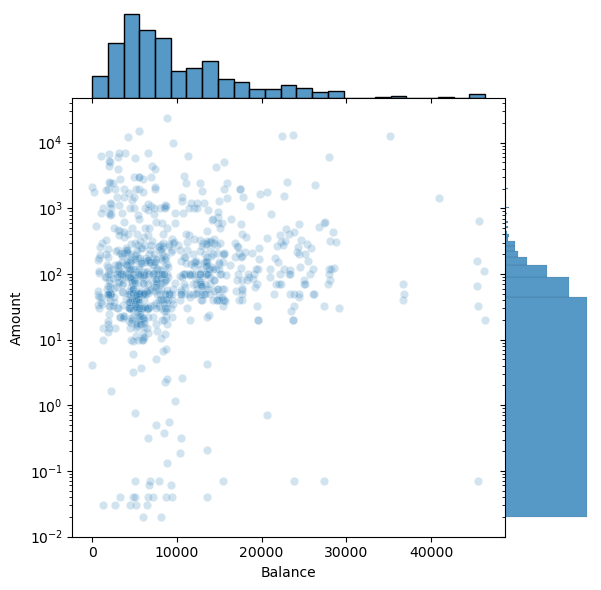

In [31]:
sns.jointplot(data=df, x='Balance', y='Amount', kind='scatter', alpha=0.2, space=0)
plt.yscale('log')
plt.title('Balance vs Amount log scaled')
plt.show()

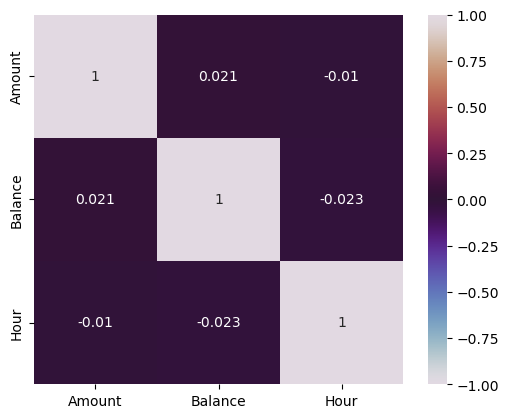

In [36]:
colormaps = [
    'viridis', 'plasma', 'inferno', 'magma', # perceptually uniform
    'Greys', 'Purples', 'Blues', 'BuPu', 'GnBu', # sequential
    'spring', 'hot', 'bone', 'winter', # sequential 2
    'PiYG', 'PRGn', 'coolwarm', 'bwr', 'seismic', # diverging
    'twilight', 'twilight_shifted', 'hsv' # cyclic
]

# Dropping the Date, Time, Description, and Category columns and calculating the correlation matrix
correlation_matrix = df.drop(columns=['Date', 'DateTime', 'Time', 'Description', 'Category', 'Emotional State']).corr()

# Plotting the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='twilight', square=True, vmin=-1, vmax=1)

plt.show()

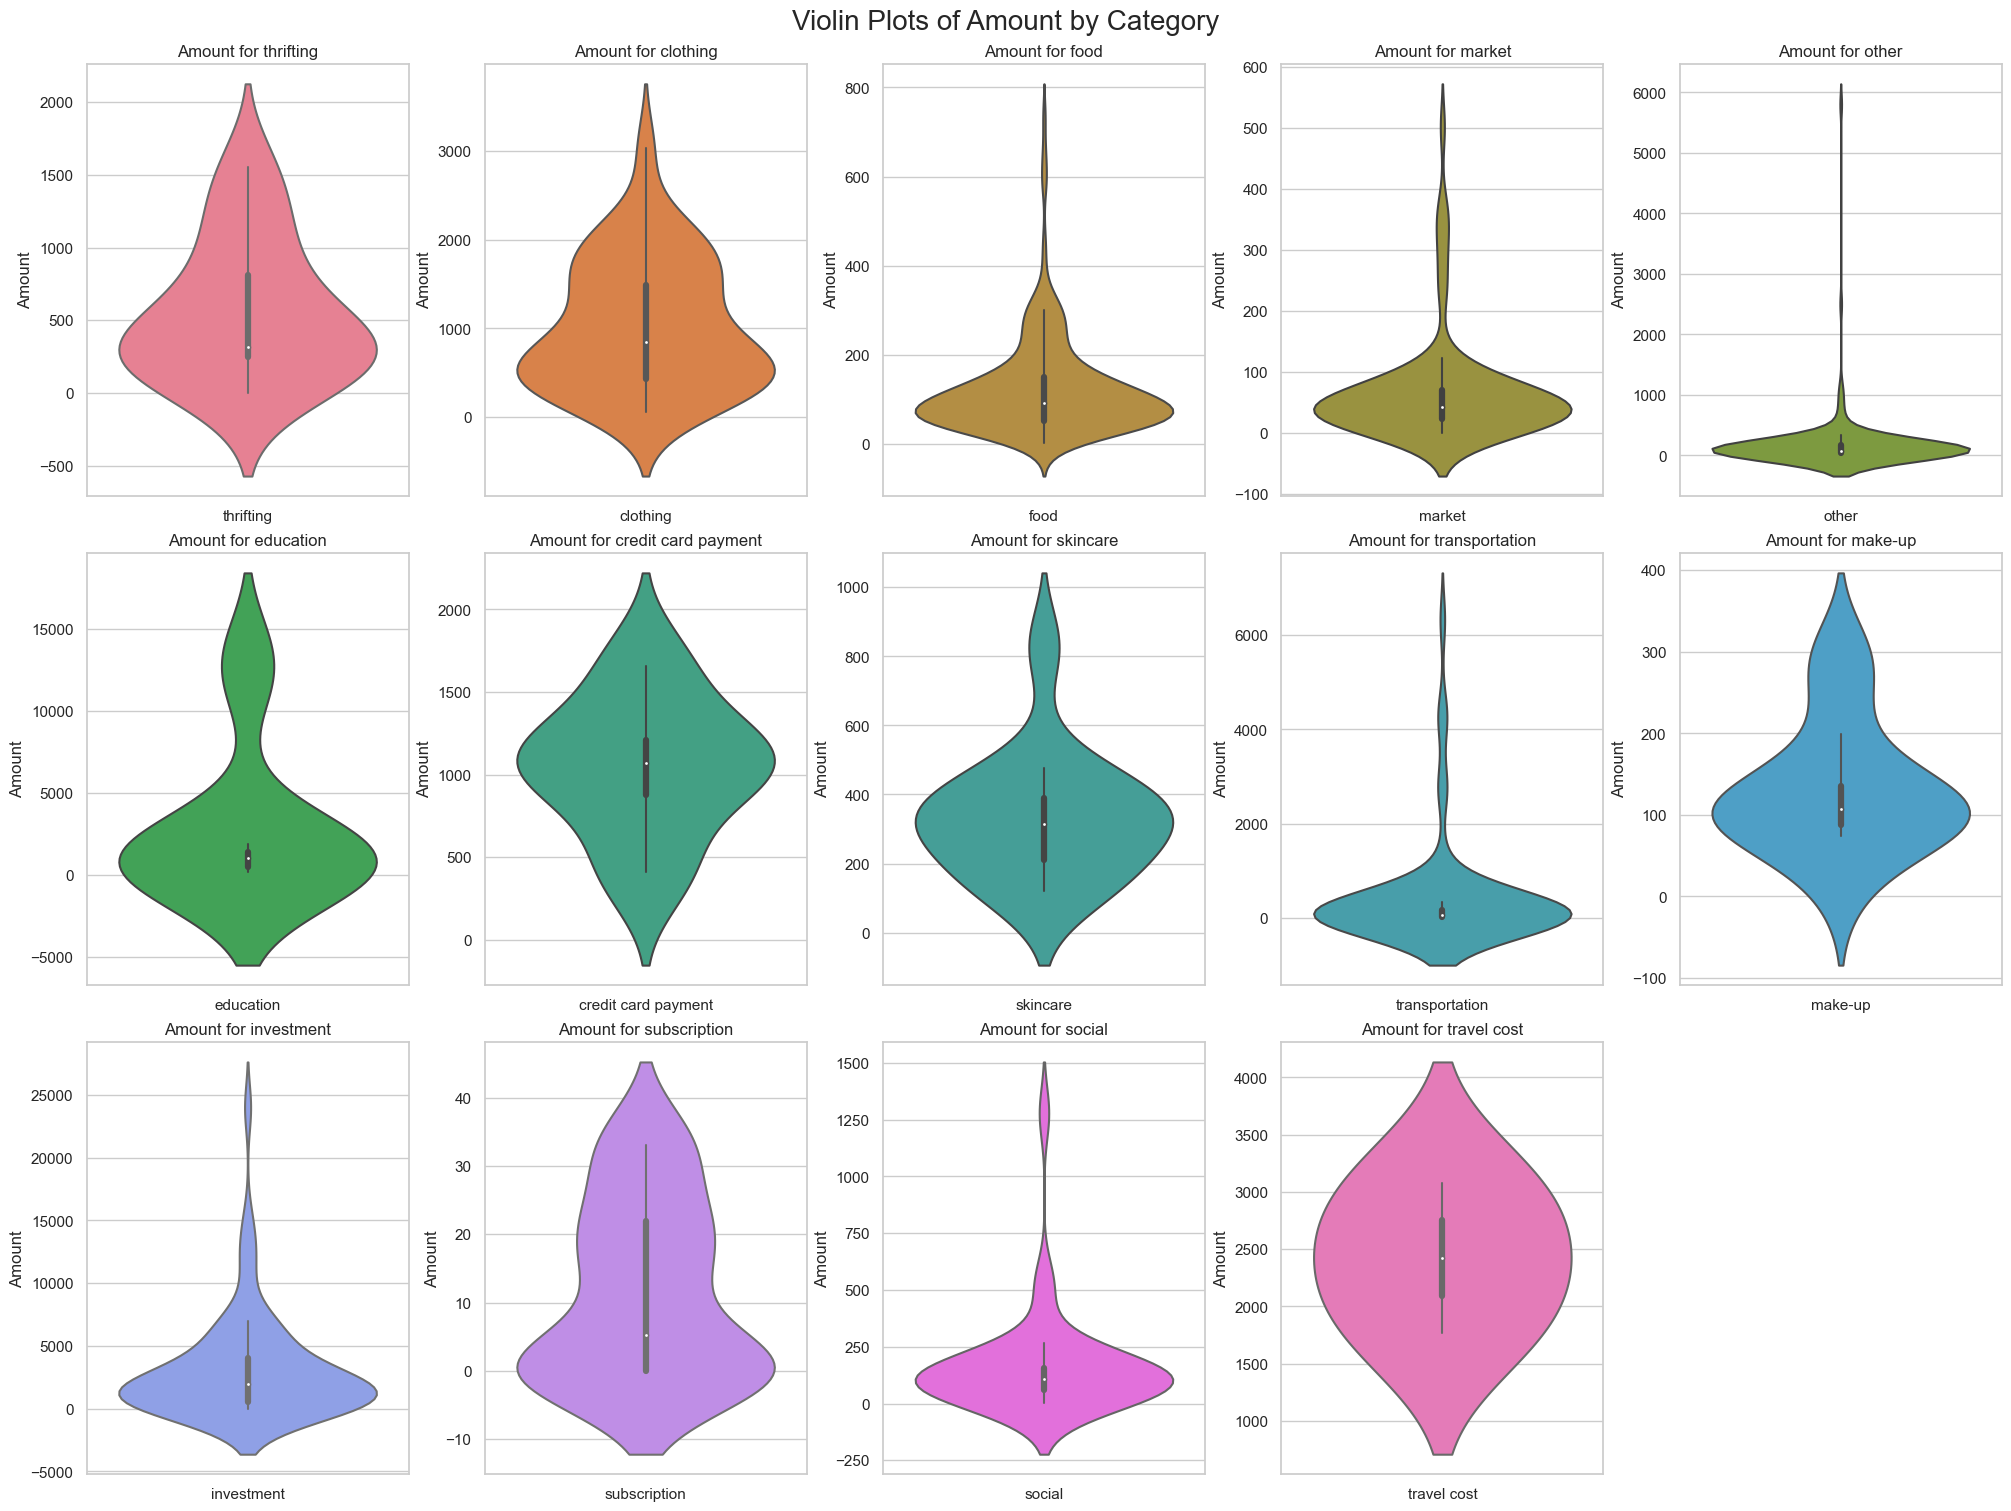

In [37]:
# Set the style and palette
sns.set(style="whitegrid")
palette = sns.color_palette("husl", len(df['Category'].unique()))

# Take the absolute values of the Amount column
df['Amount'] = df['Amount'].abs()

# Create a figure and axes
fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(20, 15), constrained_layout=True)

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop through each category and create a violin plot
for i, category in enumerate(df['Category'].unique()):
    sns.violinplot(ax=axes[i], x='Category', y='Amount', data=df[df['Category'] == category], palette=[palette[i]])
    axes[i].set_title(f'Amount for {category}')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Amount')

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.suptitle('Violin Plots of Amount by Category', fontsize=20)
plt.show()

In [38]:
df = pd.read_excel('C:/Users/sudet/Downloads/210/final_dataset.xlsx')
df.head()

,Date,Time,Amount,Balance,Description,Category,Emotional State
0,25.10.2024,23:42,-257.99,17224.27,046 DOLAP.COM XXXX 6703,thrifting,strong positive
1,25.10.2024,19:47,-1939.95,17482.26,046 IYZICO /ZARA.COM XXXX 6703 3D,clothing,strong positive
2,25.10.2024,15:29,-70.00,19422.21,062 PIZZA RESTAURANTLARI XXXX 6703,food,strong positive
3,25.10.2024,12:34,-32.00,19492.21,046 7036 İSTANBUL SABANC TEMASSIZ XXXX 6703,market,strong positive
4,25.10.2024,12:28,-20.00,19524.21,7777/MBL-HAV.ALİ OSMAN TERLEMEZ,other,strong positive


In [39]:
# Calculate the average, mode, and variance of the Amount for each Category
category_stats = df.groupby('Category')['Amount'].agg(['mean', 'var', lambda x: x.mode().iloc[0]]).reset_index()

# Rename the columns for clarity
category_stats.columns = ['Category', 'mean', 'var', 'mode']

# Display the result
print(category_stats)

               Category         mean           var      mode
0              clothing -1034.387353  5.394925e+05  -3029.00
1   credit card payment -1049.514286  1.695806e+05  -1735.76
2             education -2799.357500  2.182445e+07 -12750.00
3                  food  -123.364775  1.162550e+04    -50.00
4            investment -3115.083231  1.751832e+07  -2000.00
5               make-up  -131.723077  6.545753e+03   -299.98
6                market   -66.436667  7.492015e+03    -17.00
7                 other  -171.924751  2.343251e+05   -100.00
8              skincare  -332.516429  3.285199e+04   -827.86
9                social  -166.048529  5.211171e+04   -150.00
10         subscription   -11.470238  1.663694e+02    -32.99
11            thrifting  -555.360769  2.292813e+05  -1553.25
12       transportation  -426.954531  1.320434e+06    -30.00
13          travel cost -2423.333333  4.323083e+05  -3080.00


In [104]:
import plotly.express as px

# Analyze spending patterns within each category by emotional state
category_emotion_analysis = df.groupby(['Category', 'Emotional State'])['Amount'].sum().unstack(fill_value=0)

# Normalize spending within each category to see proportions by emotional state
category_emotion_normalized = category_emotion_analysis.div(category_emotion_analysis.sum(axis=1), axis=0)

# Reorder the columns
category_emotion_normalized = category_emotion_normalized[['strong positive', 'positive', 'mildly positive', 'neutral', 'mildly negative', 'negative', 'strong negative']]

# Visualize the proportions for each category
fig = px.bar(category_emotion_normalized.T, barmode='stack', title='Spending Patterns by Category and Emotional State')
fig.update_layout(yaxis_title='Proportion of Spending', xaxis_title='Emotional State')
fig.show()

category_emotion_normalized

Emotional State,strong positive,positive,mildly positive,neutral,mildly negative,negative,strong negative
Category,,,,,,,
clothing,0.201884,0.229252,0.200720,0.155867,0.101909,0.110369,-0.000000
credit card payment,-0.000000,0.195680,0.231767,0.482096,-0.000000,-0.000000,0.090457
education,0.030370,0.789619,-0.000000,0.005072,0.033377,0.067521,0.074042
food,0.079890,0.111206,0.126344,0.230936,0.146708,0.192413,0.112503
investment,0.048628,0.081019,0.039983,0.398981,0.222609,0.184554,0.024228
make-up,0.231139,0.060882,0.064975,0.259145,0.304321,-0.000000,0.079538
market,0.181093,0.062630,0.126234,0.171478,0.154728,0.258700,0.045136
other,0.110068,0.133006,0.037880,0.387801,0.227660,0.052272,0.051314
skincare,0.109717,-0.000000,0.120115,0.454327,0.027573,0.254261,0.034006


In [47]:
# Extract the hour part from the Time column
df['Hour'] = df['Time'].str.split(':').str[0]

# Group by Category and Hour, then sum the Amount
category_hour_analysis = df.groupby(['Category', 'Hour'])['Amount'].sum().unstack(fill_value=0)

# Normalize spending within each category to see proportions by hour
category_hour_normalized = category_hour_analysis.div(category_hour_analysis.sum(axis=1), axis=0)

# Visualize the proportions for each category
fig = px.bar(
    category_hour_normalized.T, 
    barmode='stack',
    title='Spending Patterns by Category and Hour',
    labels={'value': 'Proportion of Spending', 'index': 'Hour of the Day'},
    text_auto='.2f'
)
fig.update_layout(
    xaxis_title='Hour of the Day',
    yaxis_title='Proportion of Spending',
    legend_title_text='Category'
)
fig.show()


In [64]:
# Filter the category_hour_analysis dataframe for the clothing category
clothing_spending_per_hour = category_hour_analysis.loc['clothing']

# Plot the clothing spending per hour using Plotly
fig = px.bar(clothing_spending_per_hour, x=clothing_spending_per_hour.index, y=clothing_spending_per_hour.values, title='Clothing Spending Per Hour')
fig.update_layout(xaxis_title='Hour', yaxis_title='Spending')
fig.update_traces(marker=dict(color='blue'))

fig.show()
# Plot the number of transactions per hour for clothing using Plotly
fig = px.bar(clothing_transactions_per_hour, x=clothing_transactions_per_hour.index, y=clothing_transactions_per_hour.values, title='Number of Clothing Transactions Per Hour')
fig.update_layout(xaxis_title='Hour', yaxis_title='Number of Transactions')
fig.update_traces(marker=dict(color='orange'))
fig.show()